# Packages Import and Cleaning Coverting and Normalization of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_df = pd.read_csv("sgemm_product_dataset\sgemm_product.csv")

In [3]:
project_df['Run_Avg'] = project_df.iloc[:,14:18].mean(axis=1)

In [4]:
project_df=project_df.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

In [5]:
project_df=project_df.dropna()

In [6]:
project_df['Run_Avg'].median()
project_df['Run_Avg'] = np.where(project_df['Run_Avg'] >= project_df['Run_Avg'].median(), 1, 0)
#COnverted all the values above median to 1 and below median to zero

In [7]:
normalized_df = (project_df.iloc[:,:14] - project_df.iloc[:,:14].mean())/project_df.iloc[:,:14].std()

In [8]:
project_df.iloc[:,:14] = normalized_df
project_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,-0.999998,1
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,0.999998,1
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,-0.999998,1
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,0.999998,1
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,0.999998,-0.999998,-0.999998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,-0.999998,0.999998,0.999998,0
241596,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,-0.999998,0
241597,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,0.999998,0
241598,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,0.999998,-0.999998,0


# Train-test data split, accuracy and Gradient descent calculation Functions

In [9]:
def train_test(x):
    #x is the dataset you want to split and use for regression
    num_of_rows=int(len(x)*0.65)
    shuffle_project_df = x.sample(frac=1)
    training_set = shuffle_project_df[:num_of_rows]
    test_set = shuffle_project_df[num_of_rows:]
    return training_set,test_set

In [10]:
def accuracy(x,y):
    #x is predicted set
    #y is train or test set
    x2 = np.where(x>=0.4, 1, 0)
    x3 = np.where(x2==y, 1, 0)
    accuracy = np.sum(x3)/len(y)
    return accuracy

In [11]:
def gradient_descent(X,Y,beta,lr,threshold):
    m=len(X)
    
    array_accuracy=[]
    array_cost=[]
    array_iteration=[]

    dot_product = np.dot(X,beta)
    Y_pred = 1/(1+np.exp(-dot_product))
    count=0
    
    for i in range(1000):
        count+=1
        D_beta = (1/m)*lr*(X.T.dot(Y_pred - Y)) #derivative with respect to beta
        
        dot_product = np.dot(X,beta)
        Y_pred = 1/(1+np.exp(-dot_product))
        
        beta = beta - D_beta
        cost = -(1/m)*np.sum(Y*np.log(Y_pred)+(1-Y)*np.log(1-Y_pred))

        array_cost.append(cost)
        array_accuracy.append(accuracy(Y_pred,Y))
        array_iteration.append(i)
        
        if D_beta.mean() < threshold:
            count-=1
              
    return count, beta, array_cost, array_accuracy, array_iteration

# Part 1: All 14 Features Selected with Multiple Learning Rates

In [12]:
project_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,-0.999998,1
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,0.999998,1
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,-0.999998,1
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,0.999998,1
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,0.999998,-0.999998,-0.999998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,-0.999998,0.999998,0.999998,0
241596,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,-0.999998,0
241597,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,0.999998,0
241598,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,0.999998,-0.999998,0


In [13]:
training_set, test_set = train_test(project_df)

In [14]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## TRAIN DATA

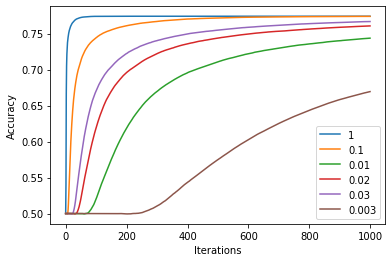

In [15]:
learning_rate = [1,0.1,0.01,0.02,0.03,0.003]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

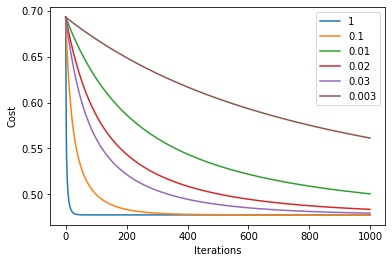

In [16]:
learning_rate = [1,0.1,0.01,0.02,0.03,0.003]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

## Test Data

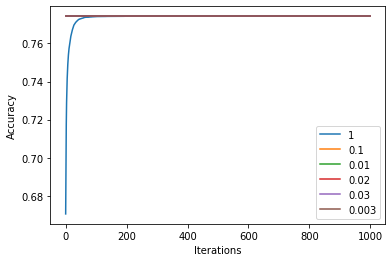

In [17]:
learning_rate = [1,0.1,0.01,0.02,0.03,0.003]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

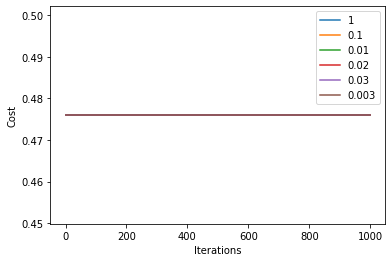

In [18]:
learning_rate = [1,0.1,0.01,0.02,0.03,0.003]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

# Part 2 All Features Selected with Multiple Threshold Values

## TRAIN DATA

0
887
896
897


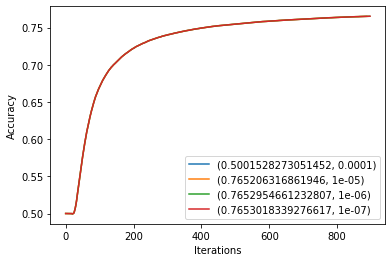

In [19]:
array_count=[]
new_cost=[]
new_accuracy=[]
learning_rate = [0.03]
threshold = [0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rate:
    for th in threshold:
        beta = np.c_[np.zeros(X_train.shape[1])]
        beta.shape=np.squeeze(beta).shape
        
        count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,th)
        array_count.append(count)
        new_accuracy.append(array_accuracy[count+1])
        new_cost.append(array_cost[count+1])
        print(count)
        plt.plot(array_iteration[:count+1],array_accuracy[:count+1],label=(array_accuracy[count+1],th))
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.legend()

No. of Iterations required to reach Convergence with threshold  0.0001  is:  0
No. of Iterations required to reach Convergence with threshold  1e-05  is:  887
No. of Iterations required to reach Convergence with threshold  1e-06  is:  896
No. of Iterations required to reach Convergence with threshold  1e-07  is:  897


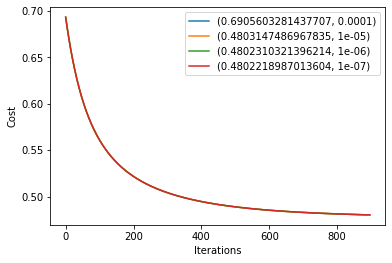

In [20]:
array_count=[]
new_accuracy=[]
new_cost=[]
learning_rate = [0.03]
threshold = [0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rate:
    for th in threshold:
        beta = np.c_[np.zeros(X_train.shape[1])]
        beta.shape=np.squeeze(beta).shape
        
        count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,th)
        array_count.append(count)
        new_accuracy.append(array_accuracy[count+1])
        new_cost.append(array_cost[count+1])
        print('No. of Iterations required to reach Convergence with threshold ',th,' is: ',count)
        
        plt.plot(array_iteration[:count+1],array_cost[:count+1],label=(array_cost[count+1],th))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()

Text(0, 0.5, 'Iterations')

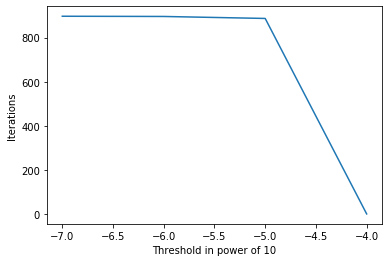

In [21]:
plt.plot(np.log10(threshold),array_count)
plt.xlabel('Threshold in power of 10')
plt.ylabel('Iterations')

Text(0, 0.5, 'Accuracy')

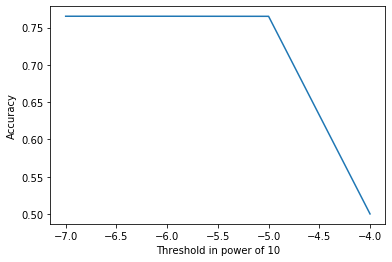

In [22]:
plt.plot(np.log10(threshold),new_accuracy)
plt.xlabel('Threshold in power of 10')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Cost')

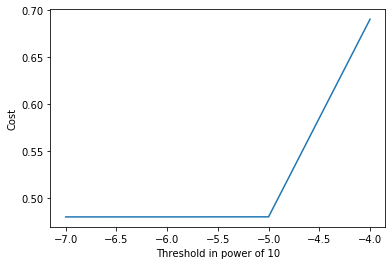

In [23]:
plt.plot(np.log10(threshold),new_cost)
plt.xlabel('Threshold in power of 10')
plt.ylabel('Cost')

## Test Data

In [24]:
array_count=[]
new_cost2=[]
new_accuracy=[]
learning_rate = [0.03]
threshold = [0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rate:
    for th in threshold:
        count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,th)
        array_count.append(count)
        new_accuracy.append(array_accuracy[count+1])
        new_cost2.append(array_cost[count+1])

array_count=[]
new_accuracy=[]
new_cost=[]
learning_rate = [0.03]
threshold = [0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rate:
    for th in threshold:
        count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,th)
        array_count.append(count)
        new_accuracy.append(array_accuracy[count+1])
        new_cost.append(array_cost[count+1])
        print('No. of Iterations required to reach Convergence with threshold ',th,' is:', count)
        
        plt.plot(array_iteration[:count+1],array_cost[:count+1],label=(array_cost[count+1],th))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()

Text(0, 0.5, 'Accuracy')

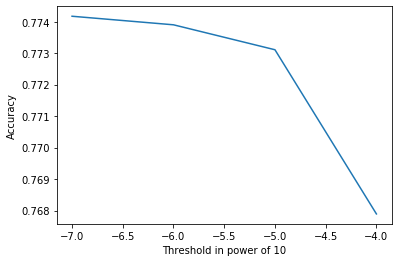

In [25]:
plt.plot(np.log10(threshold),new_accuracy)
plt.xlabel('Threshold in power of 10')
plt.ylabel('Accuracy')

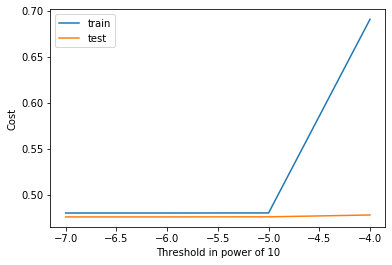

In [26]:
plt.plot(np.log10(threshold),new_cost,label='train')
plt.xlabel('Threshold in power of 10')
plt.ylabel('Cost')
plt.legend()
plt.plot(np.log10(threshold),new_cost2,label='test')
plt.xlabel('Threshold in power of 10')
plt.ylabel('Cost')
plt.legend()

# Part 3 Random 8 Features Selected

In [27]:
updated_df = project_df.iloc[:,:14].sample(8,axis=1)
updated_df['Run_Avg'] = project_df['Run_Avg']

In [28]:
training_set, test_set = train_test(updated_df)

In [29]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## TRAIN DATA

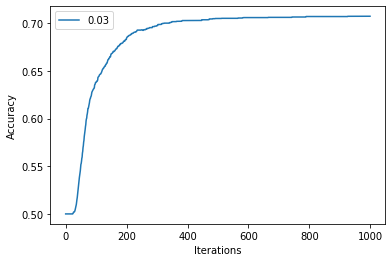

In [30]:
learning_rate = [0.03]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

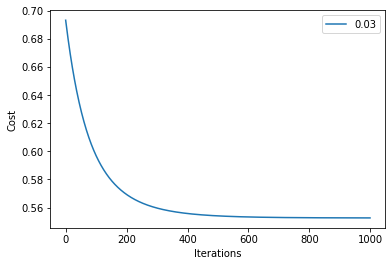

In [31]:
learning_rate = [0.03]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

In [32]:
updated_df

,NDIMB,MDIMA,MDIMC,KWG,STRM,SA,SB,MWG,Run_Avg
0,-0.998052,-0.998052,-0.753892,-1.210995,-0.999998,-0.999998,-0.999998,-1.516754,1
1,-0.998052,-0.998052,-0.753892,-1.210995,-0.999998,-0.999998,0.999998,-1.516754,1
2,-0.998052,-0.998052,-0.753892,-1.210995,-0.999998,0.999998,-0.999998,-1.516754,1
3,-0.998052,-0.998052,-0.753892,-1.210995,-0.999998,0.999998,0.999998,-1.516754,1
4,-0.998052,-0.998052,-0.753892,-1.210995,-0.999998,-0.999998,-0.999998,-1.516754,1
...,...,...,...,...,...,...,...,...,...
241595,1.558017,1.558017,2.294244,0.825764,0.999998,0.999998,0.999998,1.120450,0
241596,1.558017,1.558017,2.294244,0.825764,0.999998,-0.999998,-0.999998,1.120450,0
241597,1.558017,1.558017,2.294244,0.825764,0.999998,-0.999998,0.999998,1.120450,0
241598,1.558017,1.558017,2.294244,0.825764,0.999998,0.999998,-0.999998,1.120450,0


## Test Data

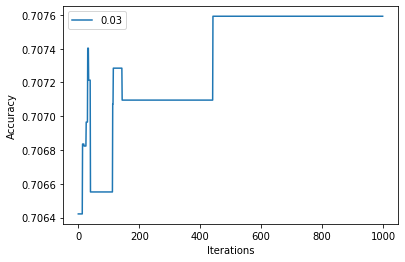

In [33]:
learning_rate = [0.03]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

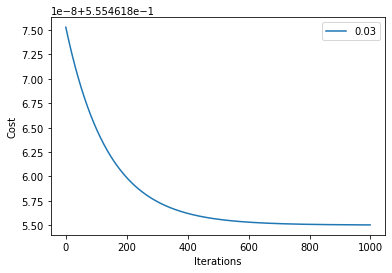

In [34]:
learning_rate = [0.03]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

# Part 4 Handpicked 8 Features Selected

In [35]:
round(project_df.corr(),5)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
MWG,1.00000,0.00060,0.00930,0.10579,-0.00859,0.15877,0.01490,-0.00000,0.35376,-0.00084,0.00000,0.00000,0.00000,0.00000,0.41119
NWG,0.00060,1.00000,0.00930,-0.00859,0.10579,0.01490,0.15877,-0.00000,-0.00084,0.35376,0.00000,0.00000,0.00000,0.00000,0.23096
KWG,0.00930,0.00930,1.00000,0.14835,0.14835,-0.03456,-0.03456,-0.00000,-0.01199,-0.01199,-0.00000,0.00000,0.00000,0.00000,-0.02159
MDIMC,0.10579,-0.00859,0.14835,1.00000,-0.20956,0.19743,0.08461,-0.00000,-0.13391,0.01053,0.00000,0.00000,0.00000,0.00000,-0.18529
NDIMC,-0.00859,0.10579,0.14835,-0.20956,1.00000,0.08461,0.19743,0.00000,0.01053,-0.13391,0.00000,0.00000,0.00000,0.00000,-0.15049
MDIMA,0.15877,0.01490,-0.03456,0.19743,0.08461,1.00000,0.08810,0.00000,-0.20271,-0.01903,-0.00000,-0.00000,0.00000,0.00000,-0.01280
NDIMB,0.01490,0.15877,-0.03456,0.08461,0.19743,0.08810,1.00000,0.00000,-0.01903,-0.20271,0.00000,0.00000,0.00000,0.00000,-0.03661
KWI,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,1.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00519
VWM,0.35376,-0.00084,-0.01199,-0.13391,0.01053,-0.20271,-0.01903,-0.00000,1.00000,0.00116,0.00000,0.00000,0.00000,0.00000,0.17567
VWN,-0.00084,0.35376,-0.01199,0.01053,-0.13391,-0.01903,-0.20271,-0.00000,0.00116,1.00000,0.00000,0.00000,0.00000,0.00000,0.08437


In [36]:
selected_df = project_df.drop(columns=['STRN','KWI','MDIMA','KWG','SB','NDIMB'])

In [37]:
training_set, test_set = train_test(selected_df)

In [38]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## TRAIN DATA

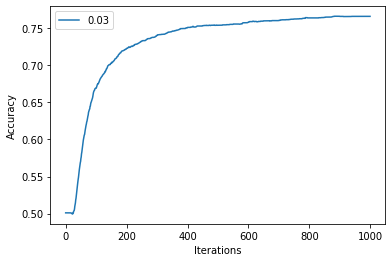

In [39]:
learning_rate = [0.03]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

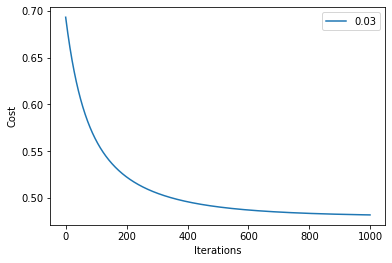

In [40]:
learning_rate = [0.03]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape
    
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_train,Y_train,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()

## Test Data

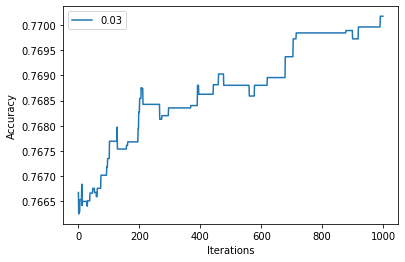

In [41]:
learning_rate = [0.03]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    plt.plot(array_iteration,array_accuracy,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

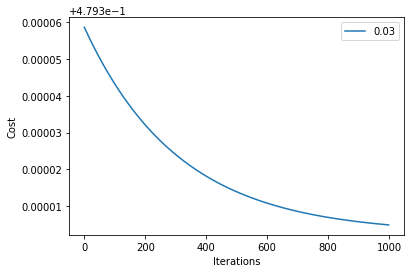

In [42]:
learning_rate = [0.03]
for lr in learning_rate:
    count, beta, array_cost, array_accuracy, array_iteration = gradient_descent(X_test,Y_test,beta,lr,0.0000000000001)
    
    plt.plot(array_iteration,array_cost,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()